# **Projeto 2**

## Ler o conjunto de dados Iris e visualizar os grupos em todas as combinações de 2 entre os 4 atributos. Cada grupo deve ser marcado com cor respectiva, e os scatterplots precisam incluir legenda das cores e/ou marcas. 

In [18]:
iris = pd.read_csv('./iris.data', sep=",", header=None)

In [19]:
column_names = ['sepal length', 'sepal width', 'petal length', 'petal width', 'label']

iris.columns = column_names

In [20]:
iris.head(10)

,sepal length,sepal width,petal length,petal width,label
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [21]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal length  150 non-null    float64
 1   sepal width   150 non-null    float64
 2   petal length  150 non-null    float64
 3   petal width   150 non-null    float64
 4   label         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [22]:
iris.describe()

,sepal length,sepal width,petal length,petal width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


### Convertendo as categorias em números

In [23]:
label_enconder = preprocessing.LabelEncoder()

label_enconder.fit(iris['label'])
## label_enconder.inverse_transform([0]) decoder

LabelEncoder()

In [24]:
iris['label'] = label_enconder.transform(iris['label'])

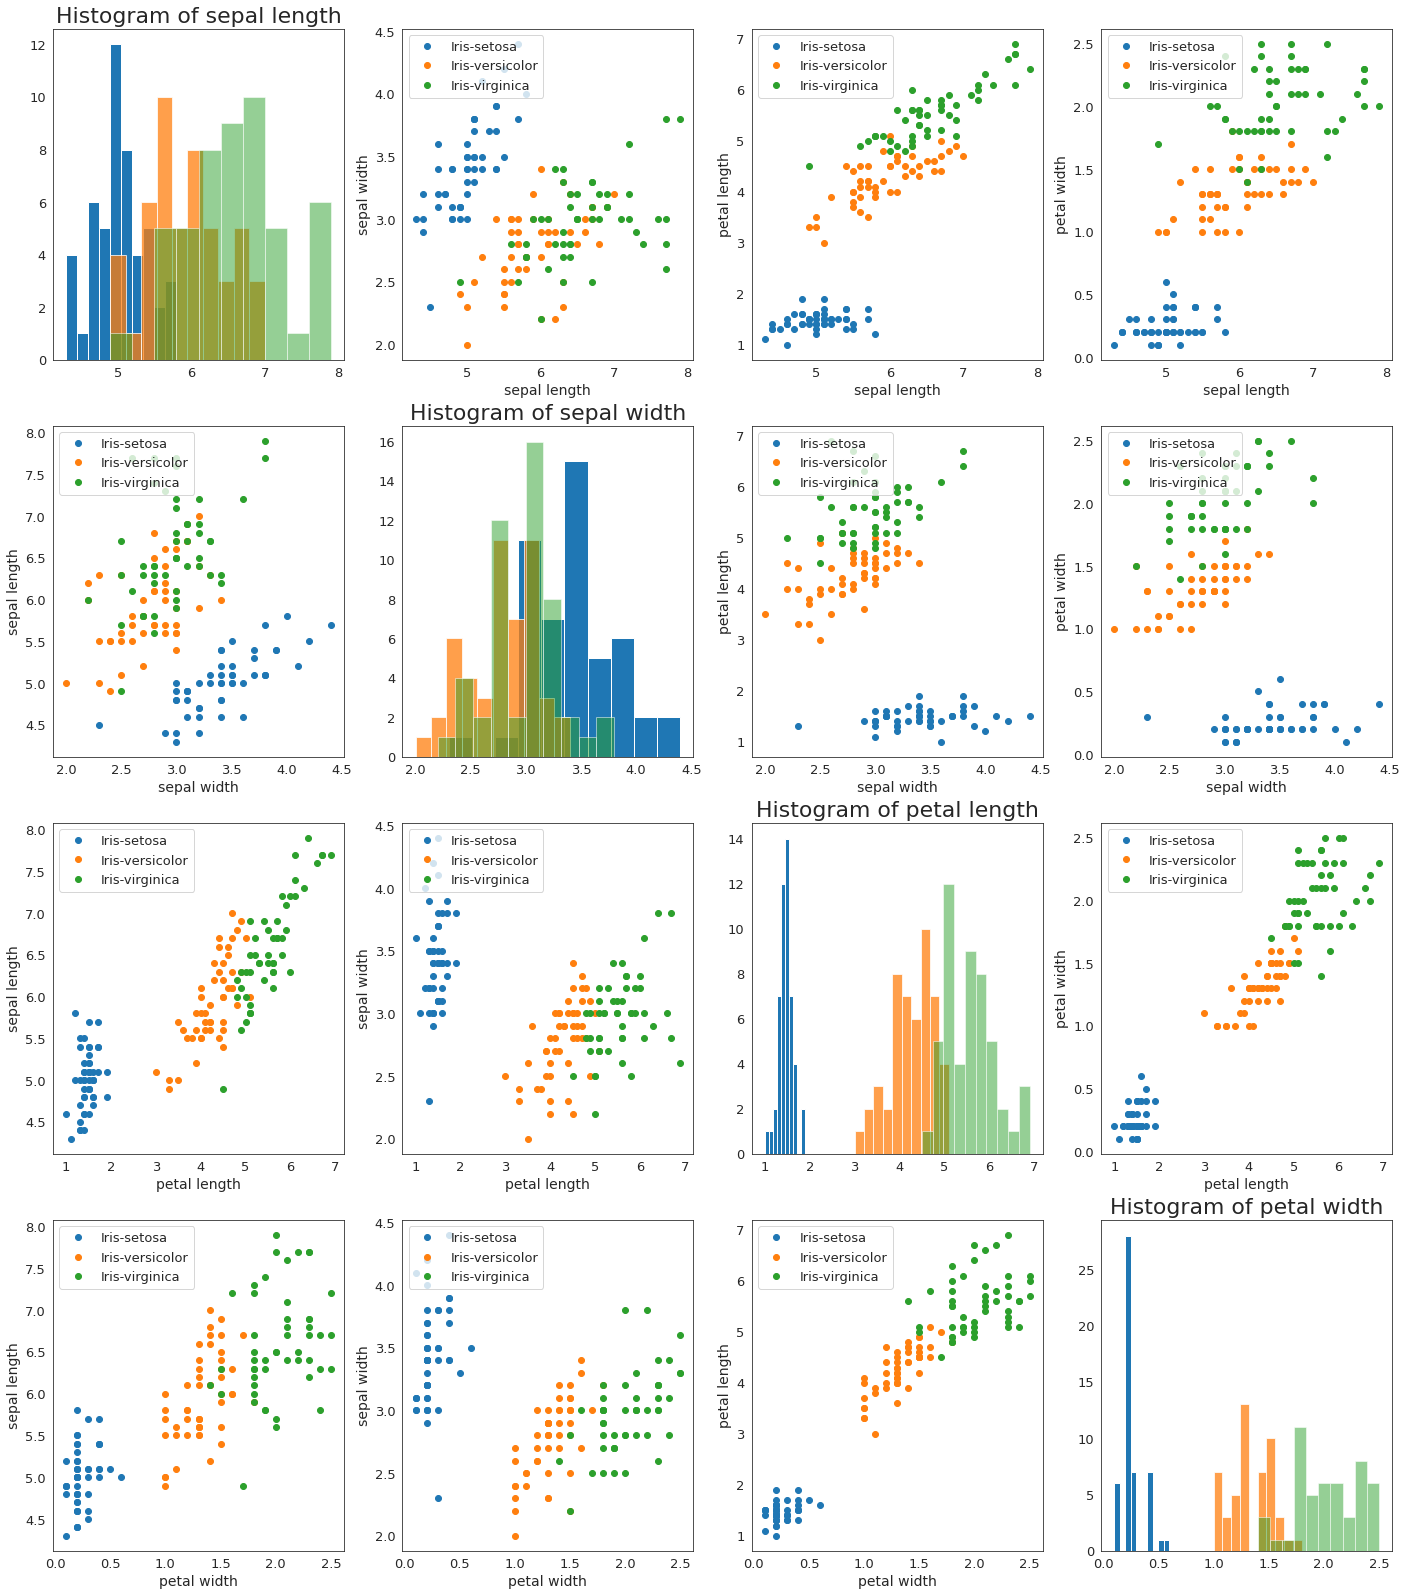

In [26]:
exploratory_plot(iris[column_names[:4]], iris['label'], label_enconder.inverse_transform([0,1,2]))
plt.savefig(f"exp", dpi=150)

## Aplicar k-vizinhos nestas configurações 2-a-2, reservando 25 casos de cada categoria para treinamento e 25 para teste

In [27]:
train, test, labels_train, labels_test = train_test_split(iris[column_names[:4]], iris['label'], 25)

In [28]:
knn_fit = knn(train, labels_train, 1)

In [29]:
labels_forecasted = knn_fit(test)

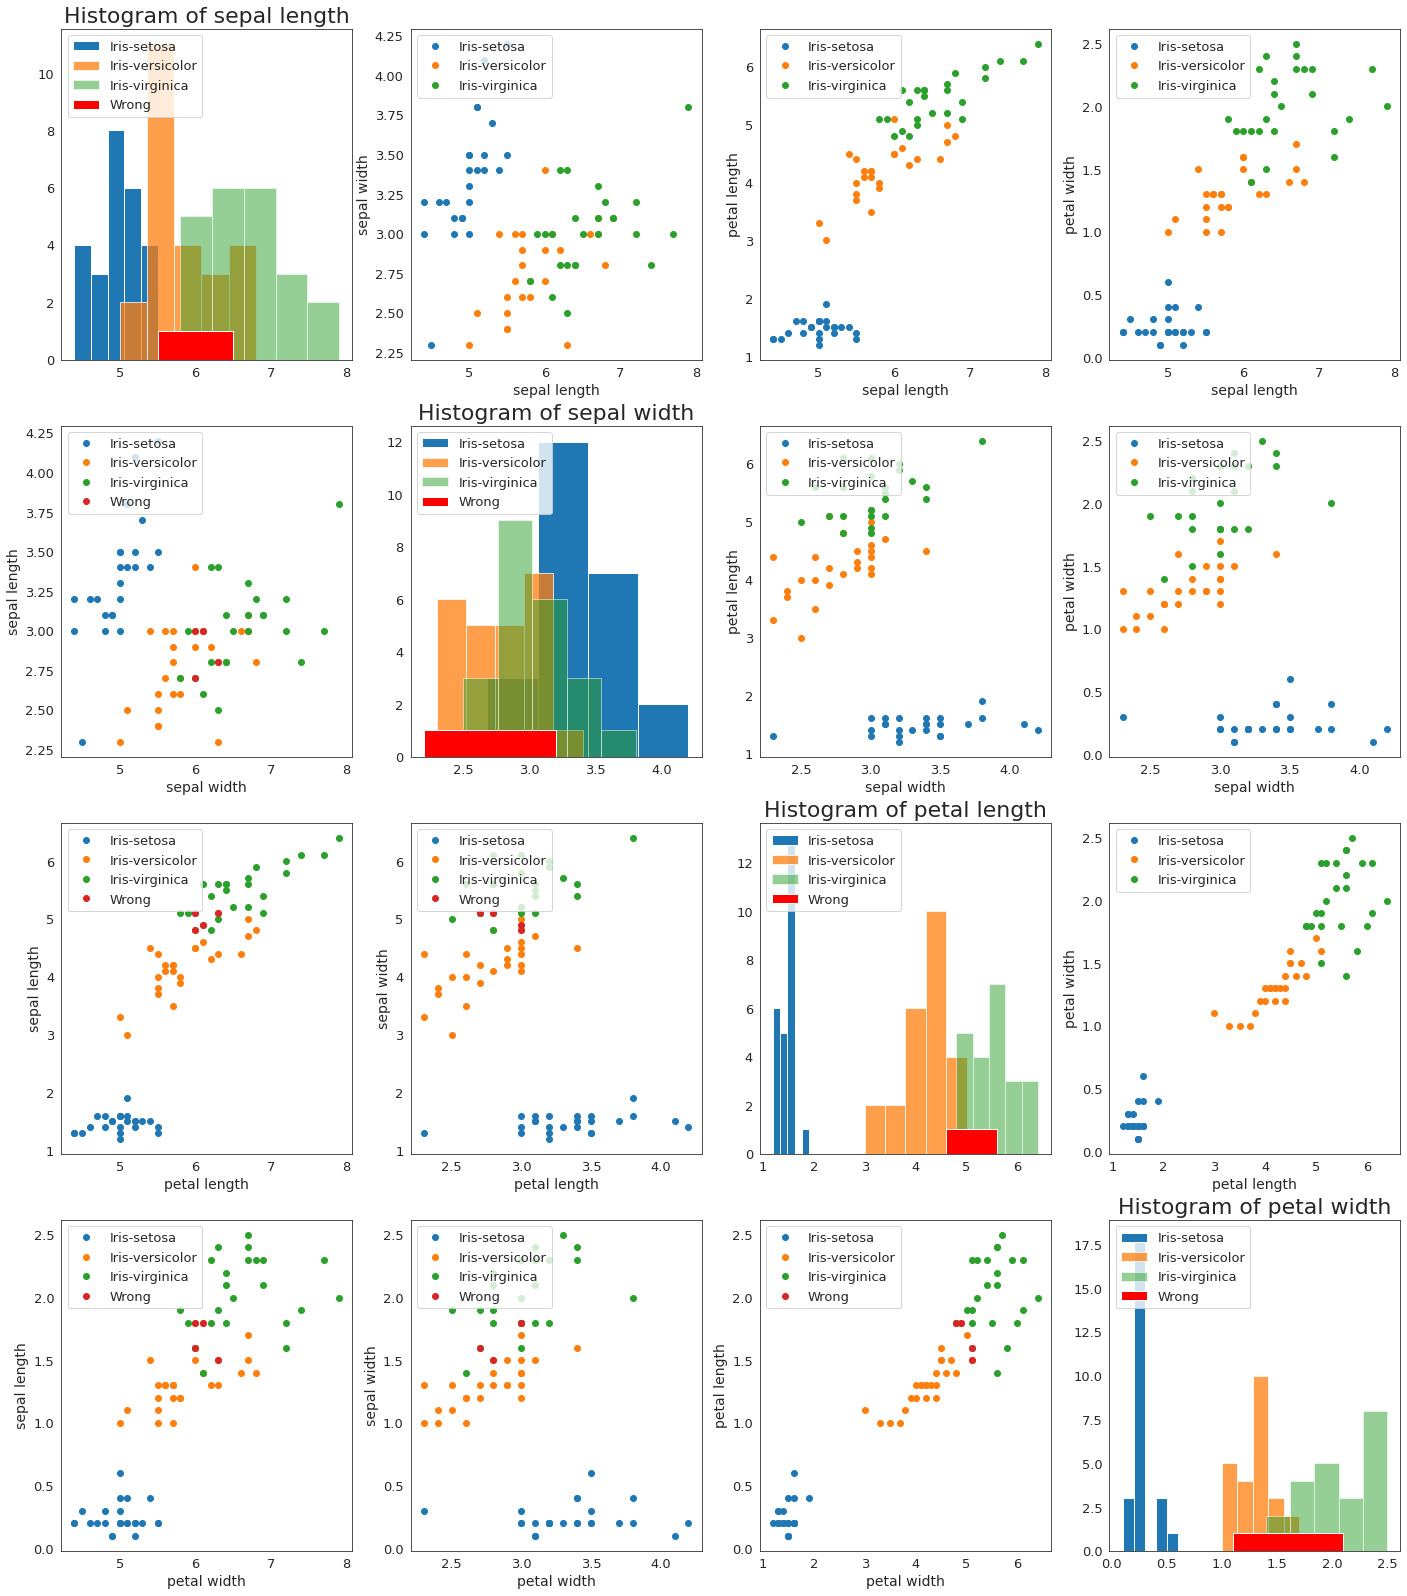

In [30]:
train_test_plot(test, labels_test, labels_forecasted, label_enconder.inverse_transform([0,1,2]))
plt.savefig(f"exp_full", dpi=150)

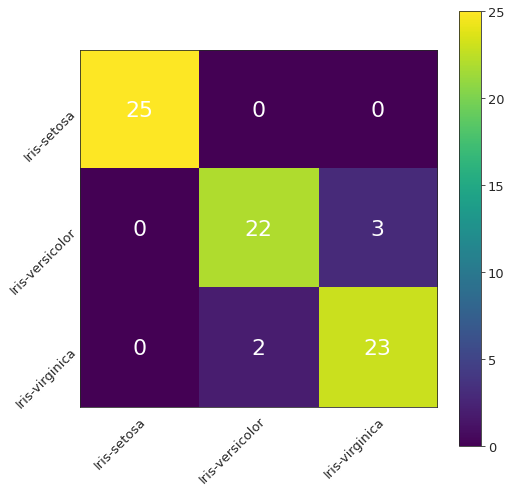

In [35]:
plot_confusion(labels_test, labels_forecasted)
plt.savefig(f"exp_full", dpi=150)

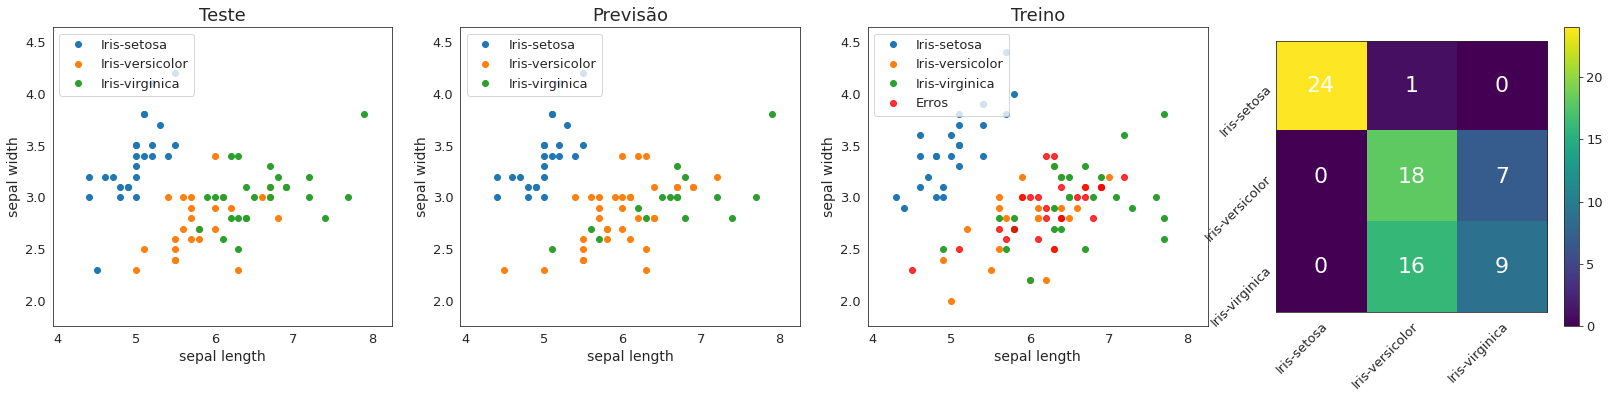

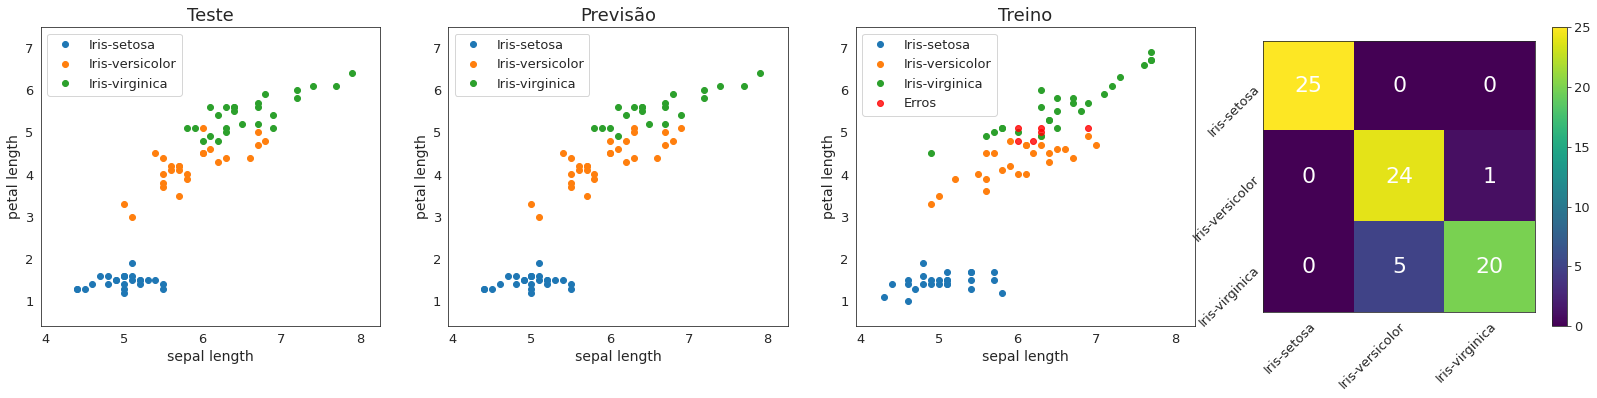

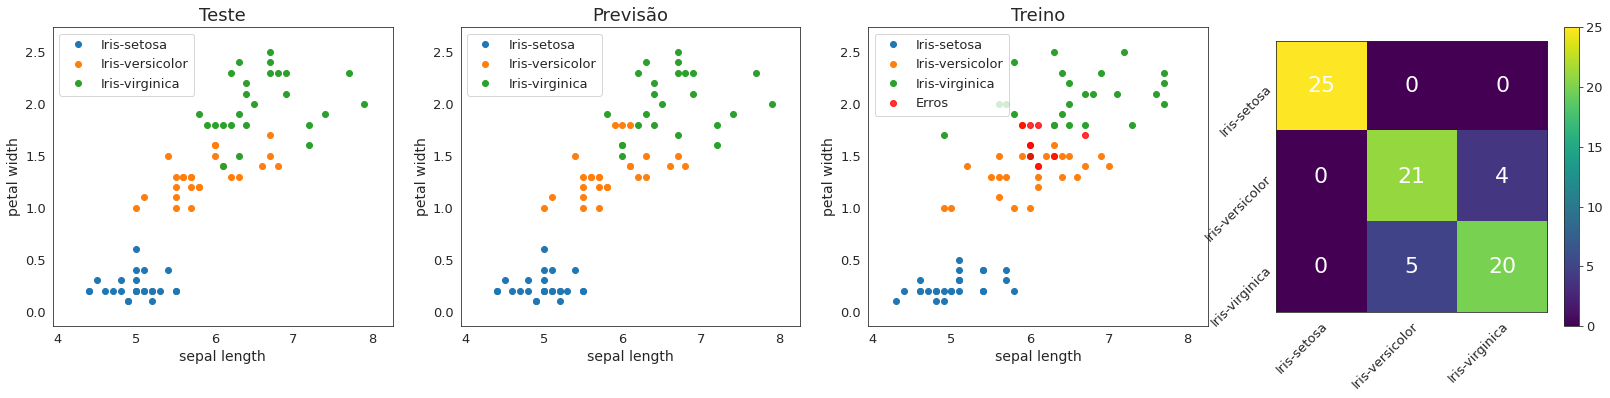

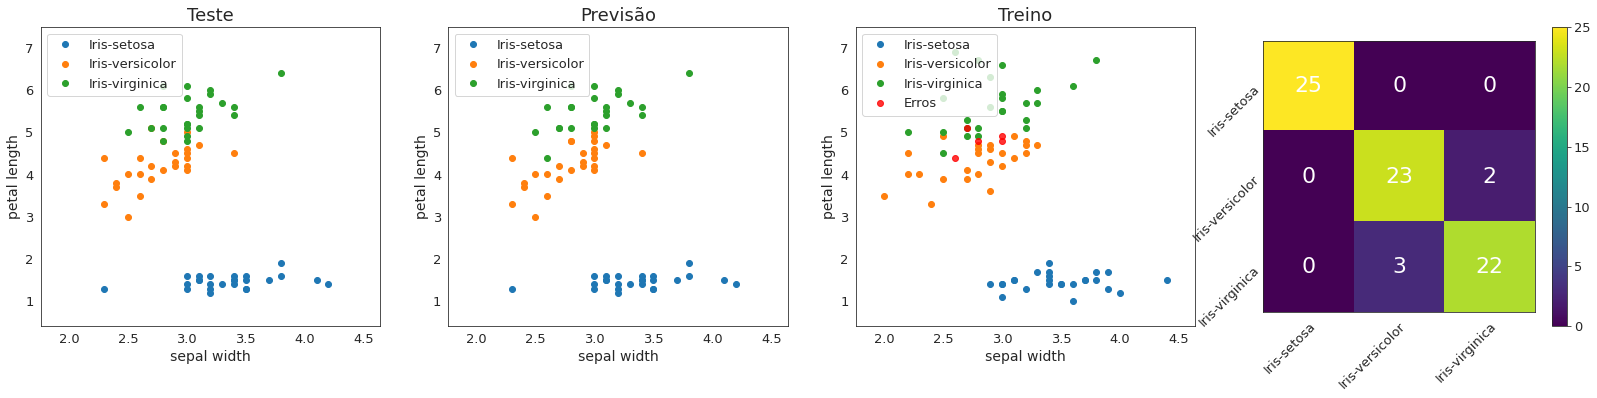

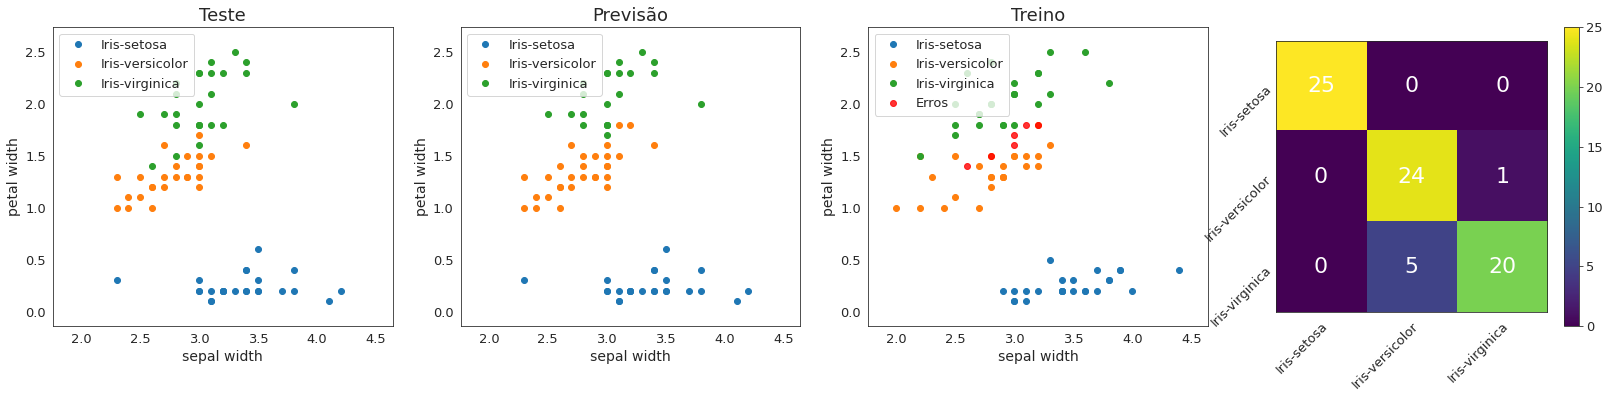

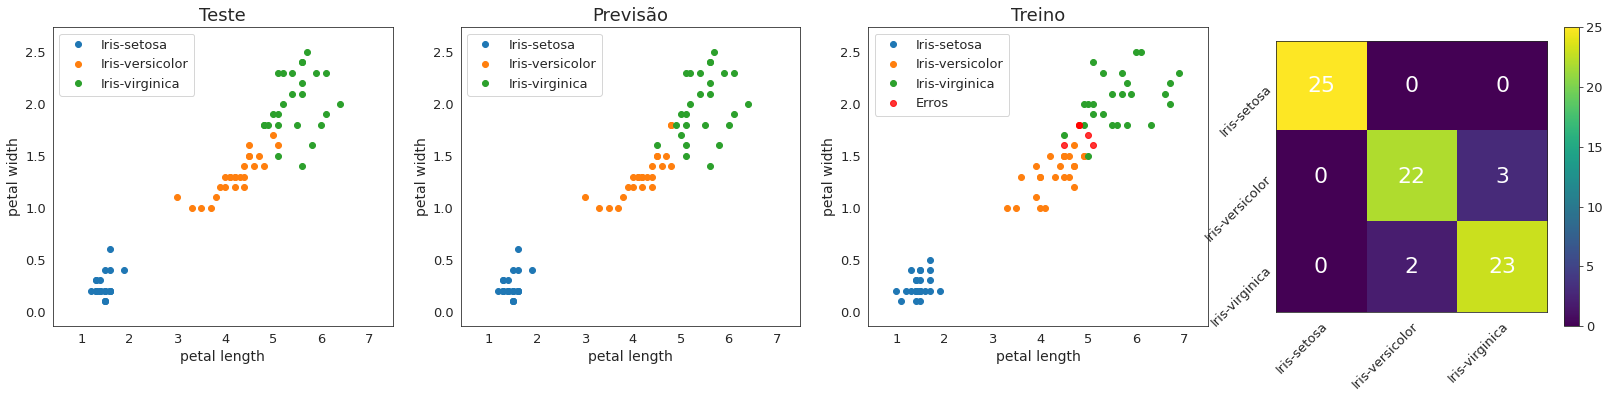

In [34]:
k = 0

for i in np.arange(4):
    for j in np.arange(i+1, 4):
        
        xlabel = column_names[i]
        ylabel = column_names[j]
        
        train, test, labels_train, labels_test = train_test_split(iris[[xlabel, ylabel]], iris['label'], 25)
        
        knn_fit = knn(train, labels_train, 1)
        labels_forecasted = knn_fit(test)

        plor_tt_piars_features(train, test, labels_train, labels_test, labels_forecasted, np.append(label_enconder.inverse_transform([0,1,2]), 'Erros'), xlabel = xlabel, ylabel = ylabel)
        plt.savefig(f"tt{k}", dpi=150)
        k+=1

In [11]:
def plor_tt_piars_features(train, test, labels_train, labels_test, labels_forecasted, legend, xlabel = '', ylabel = ''):
    
    label_values = sorted(np.unique(np.concatenate((labels_test, labels_forecasted))))
    
    n = len(label_values)
    
    l_train = np.copy(labels_train)
    l_test = np.copy(labels_test)
    l_fore = np.copy(labels_forecasted)
    
    filters_train = []
    filters_test= []
    filters_fore = []
    
    miss = labels_test != labels_forecasted
    rights = miss == False
    
    for label in label_values:

        filters_train.append(l_test == label)
        filters_test.append(l_test == label)
        filters_fore.append(l_fore == label)
   
    xmin = np.min([train[:, 0].min(), test[:, 0].min()])
    xmax = np.max([train[:, 0].max(), test[:, 0].max()])

    ymin = np.min([train[:, 1].min(), test[:, 1].min()])
    ymax = np.max([train[:, 1].max(), test[:, 1].max()])
    
    borderx = (xmax - xmin)/10
    bordery = (ymax - ymin)/10

    
    fig, axes = plt.subplots(1, 4, figsize = (4*7, 4+1.5))

    plt.sca(axes[0])
    
    for i in np.arange(n):
        
        plt.title('Teste')
        
        plt.plot(test[:,0][filters_test[i]], test[:, 1][filters_test[i]], 'o', label = label_values[i])
        
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        
        plt.xlim((xmin - borderx, xmax + borderx))
        plt.ylim((ymin - bordery, ymax + bordery))
        
        
    plt.legend(loc='upper left', labels = legend)
    
    plt.sca(axes[1])
    
    for i in np.arange(n):
        
        plt.title('Previsão')
        
        plt.plot(test[:,0][filters_fore[i]], test[:, 1][filters_fore[i]], 'o', label = label_values[i])
        
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        
        plt.xlim((xmin - borderx, xmax + borderx))
        plt.ylim((ymin - bordery, ymax + bordery))
        
    
        
    plt.legend(loc='upper left', labels = legend)
    
    plt.sca(axes[2])
    
    for i in np.arange(n):
        
        plt.title('Treino')
        
        
        plt.plot(train[:,0][filters_train[i]], train[:, 1][filters_train[i]], 'o', label = label_values[i])
        
        plt.xlabel(xlabel)
        plt.ylabel(ylabel)
        
        plt.xlim((xmin - borderx, xmax + borderx))
        plt.ylim((ymin - bordery, ymax + bordery))
        
    
    plt.plot(test[:,0][miss], test[:, 1][miss], 'o', color = 'red', label = 'Erros', alpha = 0.8)
        
    plt.legend(loc='upper left', labels = legend)
    
    plt.sca(axes[3])
    
    plot_confusion(labels_test, labels_forecasted)

In [12]:
def plot_confusion(test, forecast):
    
    values = sorted(np.unique(np.concatenate((test, forecast))))
    
    n = len(values)
    
    matrix = confusion_matrix(test, forecast)
    
    plt.imshow(matrix, cmap='viridis')
    plt.colorbar()
    
    plt.xticks(np.arange(n), label_enconder.inverse_transform([0,1,2]), rotation=45, ha="right", rotation_mode="anchor")
    plt.yticks(np.arange(n), label_enconder.inverse_transform([0,1,2]), rotation=45, ha="right", rotation_mode="anchor")  
    
    for i in range(n):
        for j in range(n):
            plt.text(j, i, matrix[i, j], ha="center", va="center", color="w", fontsize = 22)

In [13]:
def confusion_matrix(test, forecast):
    
    values = sorted(np.unique(np.concatenate((test, forecast))))
    
    n = len(values)
    
    matrix = np.zeros((n, n), dtype = int)
    
    errors = test != forecast 
    
    filters = []
    
    for v in values:
        
        filters.append(test == v)
    
    for i in np.arange(n):
        
        rights = errors == False
        
        matrix[i][i] = sum(rights & filters[i])
        
    for i in range(n):
        
        wrong_values = forecast[errors & filters[i]]
            
        unique, counts = np.unique(wrong_values, return_counts=True)
        
        for k in np.arange(len(unique)):
            matrix[i, unique[k]] = counts[k] 
        
    return matrix

In [14]:
def train_test_plot(test, labels_test,labels_forecasted, legend):
    
    df_test = np.copy(test)
    
    l_test = np.copy(labels_test)
    l_fore = np.copy(labels_forecasted)
    
    _, n = df_test.shape
    
    filters_test= []
    filters_fore = []
    
    label_values = np.unique(l_test)
    
    for label in label_values:

        filters_test.append(l_test == label)
        filters_fore.append(l_fore == label)
    
    errors = labels_test != labels_forecasted
    rights = errors == False
    
    fig, axes = plt.subplots(n, n, figsize = (n*6, n*7))
    
    for i in range(n):
        for j in range(i+1,n):
            
            plt.sca(axes[i, j])
            
            plt.xlabel(column_names[i])
            plt.ylabel(column_names[j])
            
            for f in filters_test:
    
                plt.plot(df_test[f][:, i], df_test[f][:, j], 'o', label = l_test[f][0])
            
            plt.legend(loc='upper left', labels = legend)
            
            plt.sca(axes[j, i])
            
            plt.xlabel(column_names[j])
            plt.ylabel(column_names[i])
            
            for f in filters_fore:
    
                plt.plot(df_test[f][:, i], df_test[f][:, j], 'o', label = l_fore[f][0])
            
            plt.plot(df_test[errors][:, i], df_test[errors][:, j], 'o', label = n)
                    
            plt.legend(loc='upper left', labels = np.append(label_enconder.inverse_transform([0,1,2]), 'Wrong'))
    
    for i in range(n):
        
        alpha = 1
        
        for f in filters_fore:
            
            plt.sca(axes[i][i])
            
            plt.title(f'Histogram of {column_names[i]}', fontsize = 22)     
            plt.hist(df_test[f & rights][:, i], alpha = alpha, bins= 'sqrt', label = l_fore[f][0])
            
            alpha -= 0.25
        
        plt.hist(df_test[f & errors][:, i], color='red', bins= 'sqrt', label = 'wrong')
        plt.legend(loc='upper left', labels = np.append(label_enconder.inverse_transform([0,1,2]), 'Wrong'))
        


In [15]:
def exploratory_plot(data, labels, legend):
    
    df = np.copy(data)
    l = np.copy(labels)
    
    _, n = df.shape
    
    filters = []
    
    label_values = np.unique(l)
    
    for label in label_values:

        filters.append(l == label)
    
    fig, axes = plt.subplots(n, n, figsize = (n*6, n*7))
    
    for i in range(n):
        for j in range(i+1,n):
            
            plt.sca(axes[i, j])
            
            plt.xlabel(column_names[i])
            plt.ylabel(column_names[j])
            
            for f in filters:
    
                plt.plot(df[f][:, i], df[f][:, j], 'o', label = l[f][0])
            
            plt.legend(loc='upper left', labels = legend)
            
            plt.sca(axes[j, i])
            
            plt.xlabel(column_names[j])
            plt.ylabel(column_names[i])
            
            for f in filters:
    
                plt.plot(df[f][:, j], df[f][:, i], 'o', label = l[f][0])
            
            plt.legend(loc='upper left', labels = legend)
    
    for i in range(n):
        
        alpha = 1
        
        for f in filters:
            
            plt.sca(axes[i][i])
            
            plt.title(f'Histogram of {column_names[i]}', fontsize = 22)     
            plt.hist(df[f][:, i], alpha = alpha)
            
            alpha -= 0.25


In [16]:
def knn(data, labels, k = 1):
    
    m = data.shape[0]
    
    def fit(test):
        
        n = test.shape[0]
        
        forecast = np.zeros(n, dtype = int)
        
        for i in np.arange(n):
            
            distances = {}
            
            coordinates_test = test[i]
            
            for j in np.arange(m):
                
                coordinates_train = data[j]
                
                distances[j] = np.sqrt(sum((coordinates_test - coordinates_train)**2))
            
            nn = np.array(sorted(distances.items(),key=operator.itemgetter(1)), dtype = int)[:k, 0]
            nn_labels = labels[nn]
            
            nn_unique_labels = np.unique(nn_labels)
            
            count = np.zeros_like(nn_unique_labels)
            
            for l in np.arange(len(nn_unique_labels)):
                count[l] += 1
            
            forecast[i] = nn_unique_labels[count.argmax()]
        return forecast
    return fit           

In [17]:
def train_test_split(data, labels, amount):
    
    label_values = labels.unique()
    
    n = data.shape[0] 
    m = len(label_values)
    
    filters = []
    
    train = []
    test = []
    
    count = [0]*n
    
    for value in label_values:
        
        filters.append(labels == value)
    
    for i in np.arange(n):
        
        aux = True
        
        for j in np.arange(m):
            
            if filters[j][i] and count[j] < amount:
                
                train.append(i)
                
                count[j] += 1
                aux = False
                
                break
                
        if aux:
            test.append(i)
            
    data_ = data.to_numpy()
    labels_ = labels.to_numpy()
            
    return data_[train], data_[test], labels_[train], labels_[test]

## **Blibliotecas**

In [1]:
import numpy as np

In [2]:
import pandas as pd

In [3]:
import operator

In [4]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [5]:
import seaborn as sns

In [6]:
from sklearn import preprocessing

In [7]:
%matplotlib inline

In [8]:
sns.set_style('white') # darkgrid, white grid, dark, white and ticks

In [9]:
plt.rc('axes', titlesize=18)     # fontsize of the axes title
plt.rc('axes', labelsize=14)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=13)    # fontsize of the tick labels
plt.rc('ytick', labelsize=13)    # fontsize of the tick labels
plt.rc('legend', fontsize=13)    # legend fontsize
plt.rc('font', size=13)          # controls default text sizes
plt.rc('figure', figsize = (8,8)) # Set the figure size 

In [10]:
sns.color_palette("husl", 20) # color palette exemple

[(0.9677975592919913, 0.44127456009157356, 0.5358103155058701),
 (0.9704241569984234, 0.4603475375001678, 0.3099359864545268),
 (0.8616090647292522, 0.536495730113334, 0.19548899031476086),
 (0.7632105624545802, 0.5838460616396939, 0.19465686802007026),
 (0.6804189127793346, 0.6151497514677574, 0.19405452111445337),
 (0.5920891529639701, 0.6418467016378244, 0.1935069134991043),
 (0.46810256823426105, 0.6699492535792404, 0.1928958739904499),
 (0.19316929744982803, 0.7018418078239693, 0.24321388407365968),
 (0.20125317221201128, 0.6907920815379025, 0.47966761189275336),
 (0.20631516405196249, 0.6834948167725491, 0.5761817437653648),
 (0.21044753832183283, 0.6773105080456748, 0.6433941168468681),
 (0.21461147568939787, 0.6708637556281021, 0.7042594890626992),
 (0.2197995660828324, 0.6625157876850336, 0.7732093159317209),
 (0.22829030785596155, 0.6480515334381642, 0.8744997507366618),
 (0.433280341176423, 0.6065273407962815, 0.9585467098271748),
 (0.6423044349219739, 0.5497680051256467, 0.9582651433656727),
 (0.8004936186423958, 0.47703363533737203, 0.9579547196007522),
 (0.9579148533500138, 0.358831186992106, 0.9474115985773391),
 (0.962272393509669, 0.3976451968965351, 0.8008274363432775),
 (0.9651791951613143, 0.4212549802305815, 0.6785112441648762)]